<a href="https://colab.research.google.com/github/majaszymajda/PNoD_wyklad/blob/main/Regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model opracowany za pomocą metody najmniejszych kwadratów

Sama metoda najmniejszych kwadratów służy do wyliczenia a – czyli parametrów modelu, a zadanie najmniejszych kwadratów polega na minimalizacji funkcji błędu, która określa różnicę między obserwacjami a wartościami zwracanymi przez model, czyli znalezieniu modelu najlepiej dopasowanego do danych.
Do znalezienia krzywej najlepiej dopasowanej.


In [47]:
import csv
import time
from datetime import datetime
import numpy as np
import pandas as pd
import sklearn
import requests
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Wczytanie pliku csv

In [ ]:
def importowanie_danych_csv(nazwa_pliku):
    with open(nazwa_pliku) as plik:
        dane = csv.reader(plik, delimiter=';')
        dane_tablica = []
        try:
            for dana in dane:
                dane_tablica.append(dana)
            print(dane_tablica)
        except csv.Error as error:
            print(f"nie udało się wczytać pliku {nazwa_pliku} błąd: {error.msg} ")
            return None

    return dane_tablica

# Pobieranie danych z pliku z mojego Githuba 

In [41]:

files = [
  "czas_kalorie.csv"
]

def download_and_save_locally(file):
    data = requests.get(f'https://github.com/majaszymajda/PNoD_wyklad/raw/main/{file}')
    if data.status_code != 200:
      print(f"Blad pobierania pliku {file}")

    with open(file, "wb") as f:
      f.write(data.content)

    print(f"Pobrano plik {file}")
    # unzipped_content = gzip.open(io.BytesIO(data))
   # f'df{file}' = pd.read_csv(unzipped_content, delimiter='\t')
 
    # df{file}.head()

for f in files:
    download_and_save_locally(f)
    # dane = importowanie_danych_csv(f)
    # odczytywanie danych z pliku csv
    dataset = pd.read_csv(f)
    # podział naszych danych na x i y 
    X = dataset.iloc[ : , : -1]
    Y = dataset.iloc[ : , -1]

Pobrano plik czas_kalorie.csv


In [ ]:
# wilgoc = [] # cisnienie
# temp = [] # temeperatura
# czas = [] # czas
# for i in range(1, 50):
#  wilgoc.append(float(dane[i][2]))
#  temp.append(float(dane[i][1]))
#  czas.append(float(dane[i][0]))


#  Przygotowanie danych do dalszej pracy pracy - ramka

In [ ]:
x = pd.DataFrame(X)
y = pd.DataFrame(Y)


# Podział danych na treningowe i testowe

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

# Wizualizacja danych przed uczeniem maszynowym  

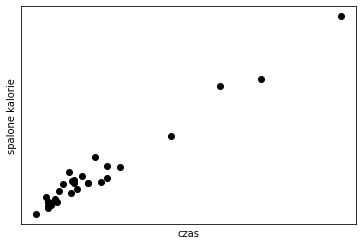

In [46]:
# print(x_train)
# print(y_train)
plt.scatter(x_train, y_train,  color='black')
plt.xlabel("czas")
plt.ylabel("spalone kalorie")
plt.grid(True)

plt.xticks(())
plt.yticks(())

plt.show()

Będziemy dążyć do znalezienia modelu jak najlepiej odwzorującego spalane kalorie od czasu trwania treningu

Zasada działania MNK:
Zakładamy, że dany jest model y=fi(x)^T * W ,
 (w to wektor parametrów, a fi to wektor cech. Interesuje nas dopasowanie modelu do obserwacji y. Zakładając, że rząd macierzy = M liczymy gradient z funkcji(sumy kwadratów różnic między predykcjami a obserwacjami) i przyrównujemy go do zera, wyliczając w - minimalizacja. W możemy wyliczyć za pomocą liczenia pochodnej po sumie rozwiązując jak równanie, bądź macierzowo. 

# Wykonanie modelu regeresji liniowej i sprawdzenie jego jakości średnim błędem kwadratowym

In [49]:
# regresja liniowa
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

# predykcja dla danych testowych
y_pred = regr.predict(x_test)

# współczynnik regresji
print('Współczynnik regesji: \n', regr.coef_)
# średni bład kwadratowyy
print('średni błąd kwadratowy: %.2f'
      % mean_squared_error(y_test, y_pred))
# współczynnik determinacji 
print('współczynnik determinacji: %.2f'
      % r2_score(y_test, y_pred))

#print(x_train)
#print("_-----")
#print(regr.predict(x_train))


Współczynnik regesji: 
 [[3.72336855]]
średni błąd kwadratowy: 1900.03
współczynnik determinacji: 1.00


# Wizualizacja modelu

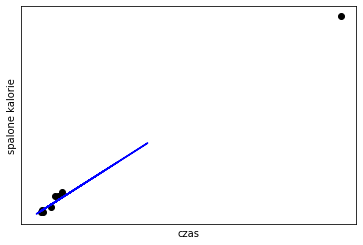

In [50]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_train, regr.predict(x_train), color='blue')
plt.xlabel("czas")
plt.ylabel("spalone kalorie")
plt.grid(True)

plt.xticks(())
plt.yticks(())

plt.show()

MNK używamy gdy np. chcemy zlinearyzować model (można wielomian włożyć w macierz wejść i parametrów)
Kiedy możemy operować na gołych(nie modelujemy w żaden dodatkowy sposób) parametrach, czyli estymuje wartość mierzonej wielkości.
Zakłócenia są addytywne(sumują się). 
Wartość oczekiwana zakłóceń jest 0.
